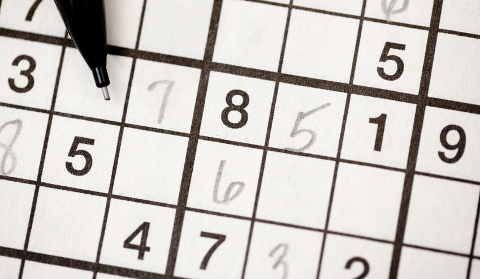

In [1]:
import cv2
import numpy as np

from PIL import Image

   
img = cv2.imread('sudoku.jpg')[..., ::-1]
Image.fromarray(img)

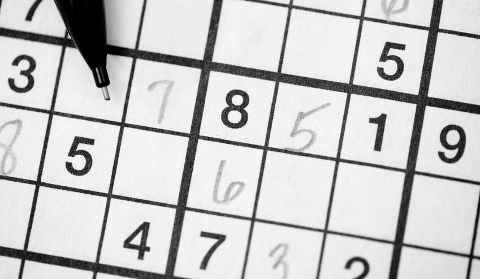

In [2]:
#Zmiana obarzu na obraz w skali szarości
img_Gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Image.fromarray(img_Gray)

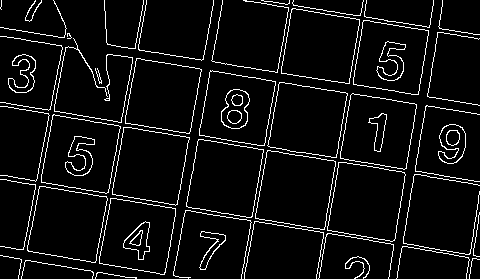

In [17]:
#Detekcja krawędzi metodą Canny'ego - wynik zależy od doboru wartości progów:
kr_Canny = cv2.Canny(image=img_Gray, threshold1=300, threshold2=500)
Image.fromarray(kr_Canny)

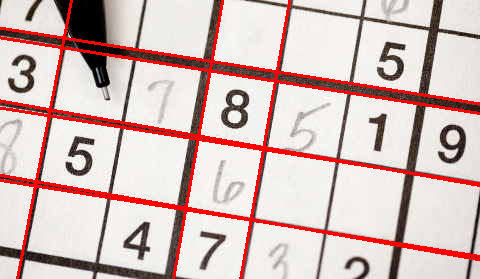

In [4]:
#Zastosowanie transformaty Hougha na wynikach operatora Canny (ostatni parametr - próg dla wartości akumulatora)
lines = cv2.HoughLines(kr_Canny, 1, np.pi/180, 170)

image_lines = img.copy()
#Aby narysować wyniki, przechodzimy ze współrzędnych rho-theta na XY
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image_lines, (x1,y1), (x2,y2), (255,0,0), 2)

Image.fromarray(image_lines)